## import relevant packages

In [1]:
#for reading data and dataframe manipulation
import pandas as pd
#for numerical computation
import numpy as np
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for logistic regression
from sklearn.linear_model import LogisticRegression
#for splitting data
from sklearn.model_selection import train_test_split
#for standardization
from sklearn.preprocessing import StandardScaler
#metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay,
                             confusion_matrix, f1_score)

In [2]:
#path file is found
path = '/Users/user/Downloads/Loan_Modelling.csv'
#read the data
raw_data = pd.read_csv(path)

#view 5 rows of data
raw_data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# EDA

In [3]:
#check for duplicated entries
raw_data.duplicated().sum()

0

- there are no duplicated entries

In [4]:
#check for missing values
raw_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- there are no missing values

In [5]:
#look at the overview summary of the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- all the rows are numerical and there are no missing values

In [6]:
#shape of the data
raw_data.shape

(5000, 14)

- there are 5000 rows and 14 columns in the data

In [7]:
for i in raw_data.columns:
    print(i.upper())
    print(raw_data[i].unique())

ID
[   1    2    3 ... 4998 4999 5000]
AGE
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
EXPERIENCE
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
INCOME
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]

- i will drop Id and zipcode because they most likely will not contribute to solving the problem

In [8]:
df = raw_data.drop(["ID", "ZIPCode"], axis=1)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


<AxesSubplot:>

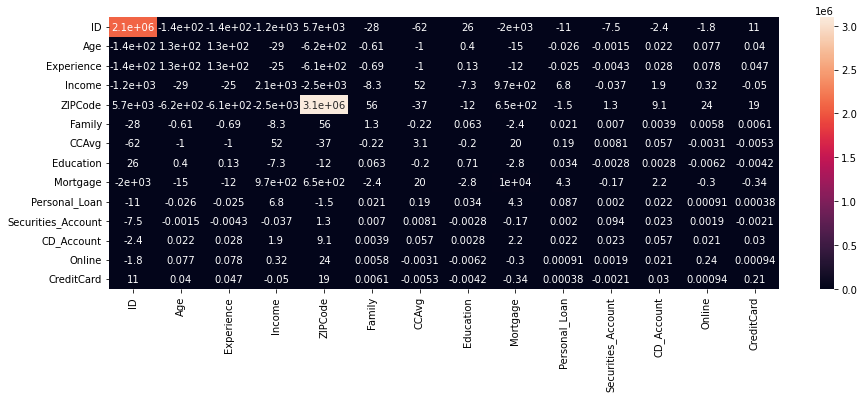

In [220]:
#raw_data.cov()
plt.figure(figsize=(15,5))
sns.heatmap(data=raw_data.cov(), annot=True)

In [9]:
#display a descriptive statistics for the data
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


- Age:
    - the mean age of the sample is 45.34, which is close to the median of 45. this means that the distribution of the age is expected to be approximately normally. 25% of the population are below 35. the lowest and highest age are 23 and 67 respectively. this connotes that the data is populated with more people within the working class age bracket.

- Experience:
    - the minimum years of experience is -3, this is strange. 25% of the population has a maximum of 10years professional experience.half of the population has 20 years and the maximum years of experience is 43years. the distribution is also expected to be normal.
    
- Income:
    - the lowest income earner in the data earns $8,000  while the highest earner gets 224,000. this distribution is expected to be right-skewed because of the presence of outliers which are people that a lot more than the others

- Family:
    - 50% of the people have maximum of 2 family members. the maximum number of family members that anyone in the data have is 4.

- CCAvg:
    - the lowest spending on credit card is zero. why?
    - the maximum spending however is $10,000.
    - 50% of the people spending max of $1,500 and the mean is $1,938. suggesting the presence of outliers
- Education:
    - 25% of the people are undergraduates
    - 50% of the people had a graduate certificate

- Mortgage:
    - 50% of the people do not have housing mortgage. this distribution is expected to be heavily right-skewed

- Securities_Account:
    - 75% of the people do not own a security account with the bank
- CD_Account:
    - at least 75% of the customer do not have a certificate of deposit (CD) account with the bank

- Online:
    - about 50% of the customers use internet banking facilities
- CreditCard:
    - only about 25% of customer use a credit card issued by any other Bank

# univariate analysis

In [10]:
from utils import histogram_boxplot,labeled_barplot

In [11]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

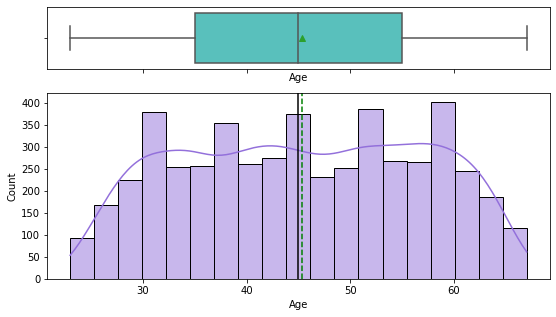

In [12]:
histogram_boxplot(data=df, feature='Age', kde=True)

- this shows that the age distribution is approximately uniform

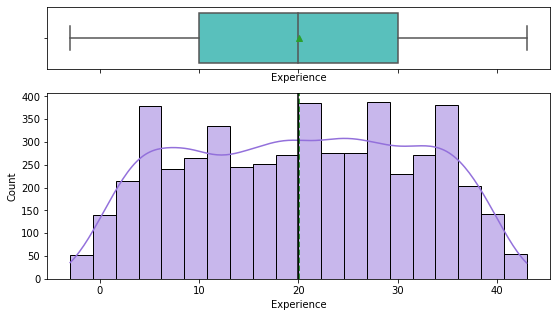

In [13]:
histogram_boxplot(data=df, feature='Experience', kde=True)


- this shows that the distribution of the experience is normally distributed
- there are no outliers

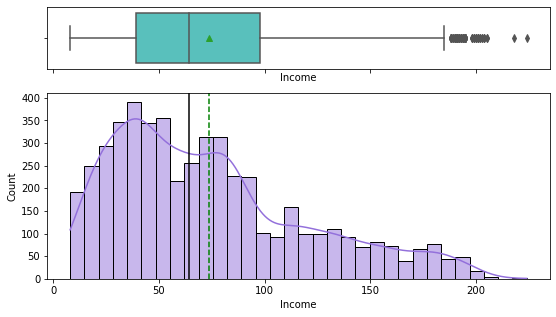

In [14]:
histogram_boxplot(data=df, feature='Income', kde=True)

- the distribution of the income is right skewed due to the presence of outliers.
- i will do a log transformation of this feature

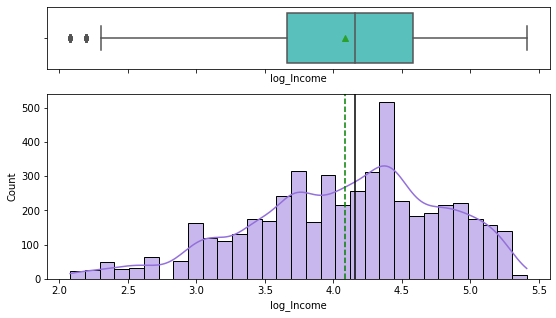

In [15]:
df['log_Income'] = np.log(df.Income)
histogram_boxplot(data=df, feature='log_Income', kde=True)

- this distribution shows a left skew. however, the outliers have been reduced to a great extent.
- i will drop the Income variable

In [16]:
df = df.drop(['Income'], axis=1)

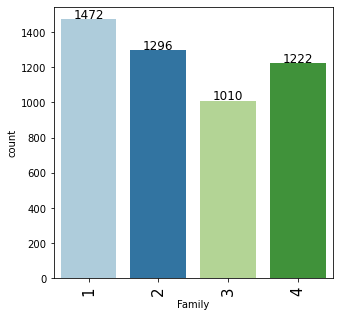

In [17]:
labeled_barplot(data=df, feature='Family')

- 1472 people in the data just have 1 family member
- relative to other subcategories, the smallest number of people (1010) has 3 family members


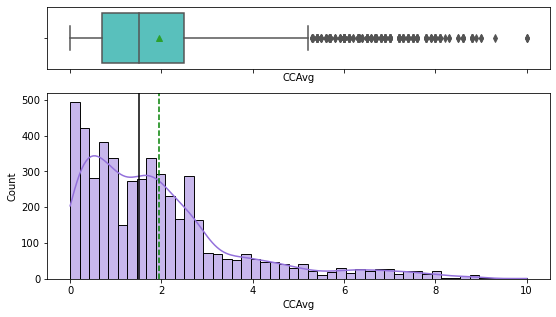

In [18]:
histogram_boxplot(df, 'CCAvg', kde=True)

- the distribution is right skewed


In [19]:
#df['CCAvg'] = np.log(df.CCAvg)

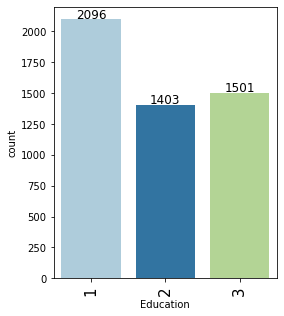

In [20]:
labeled_barplot(df, 'Education')

- 2096 of the people are undergraduates
- 1403 were graduates
- 1501 had profession or advanced degrees

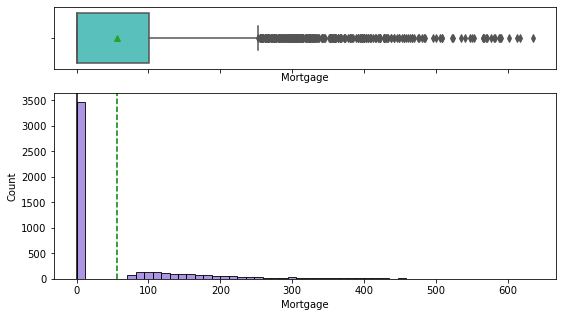

In [21]:
histogram_boxplot(df, 'Mortgage')

- most of the people do not have mortgage. the outliers are important.

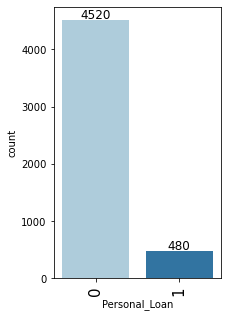

In [22]:
labeled_barplot(df, "Personal_Loan")

- Personal_Loan:
    - out of 5000 people, only 480 took the loan offer

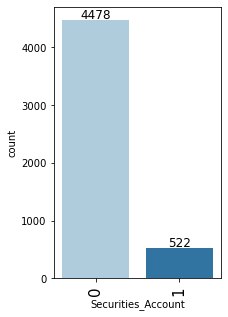

In [23]:
labeled_barplot(df, "Securities_Account")


- only 522 customers have securities account with the bank

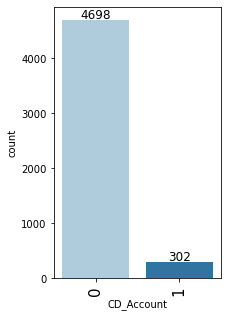

In [24]:
labeled_barplot(df, "CD_Account")




- 302 customers have a certificate of deposit with the bank

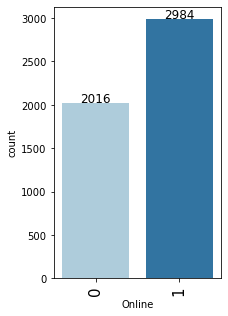

In [25]:
labeled_barplot(df, "Online")


- 2984 customers make use of the banks internet banking facilities

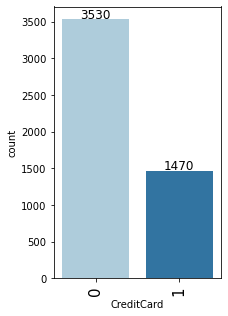

In [26]:
labeled_barplot(df, "CreditCard")

- 1470 of the customers have creditcard with other banks

# Bivariate Analysis

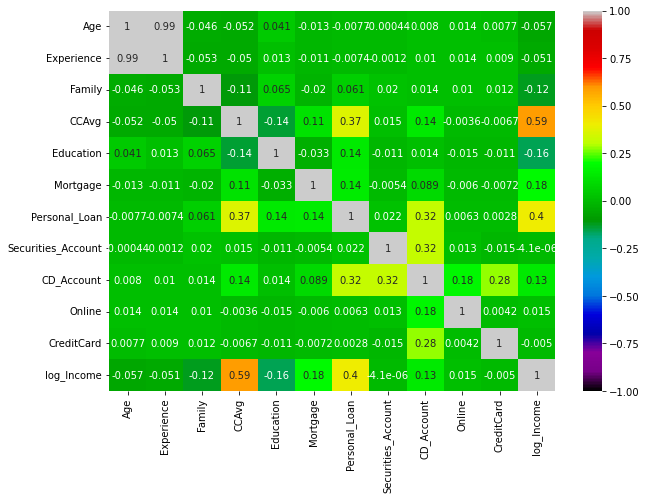

In [27]:
#plot a correlation matrix using a heatmap

#select numeric colums
corr = df.select_dtypes(include="number")

#set figure
plt.figure(figsize=(10,7))
#plot heatmap
sns.heatmap(data=corr.corr(), vmax=1, vmin=-1, annot=True,cmap='nipy_spectral',)
plt.show()

- age exhibits high postive correlation with experience and for the purpose of logistic regression only, i will drop the feature this is to avoid multicollinearity.
- the correlation plot suggests that there is slight +ve correlation between CCAvg , CD_Account and lod_Income with personal_loan. this means that people with higher values for these features have higher tendency to accept loan offer.


## Age and Personal_loan

Text(0.5, 1.0, 'AGE VC P_LOAN')

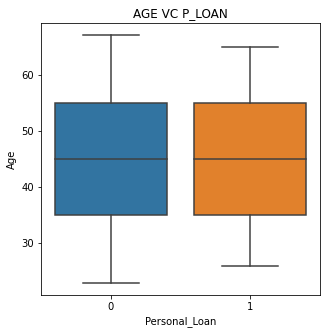

In [28]:
#set the figure
plt.figure(figsize=(5,5))
#plot a boxplot
sns.boxplot(data=df, y='Age', x='Personal_Loan')
plt.title("AGE VC P_LOAN")

- this shows that customers that accpeted the loan are within the age class of approximately 27 to 63
- it shows that people of all age groups between 27-63 accessed the loan.

<AxesSubplot:xlabel='Age', ylabel='Count'>

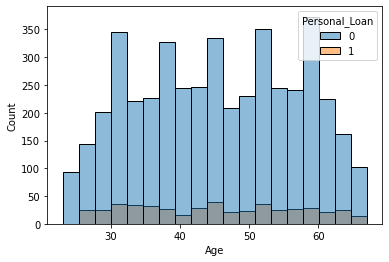

In [29]:
sns.histplot(data=df, x='Age', hue='Personal_Loan')


- from the chart, customers of ages: 31, 38-39, 45, 51 and 59 have higher proportion of people that rejected the loan to those that accepted.

Text(0.5, 1.0, 'Experience VC P_LOAN')

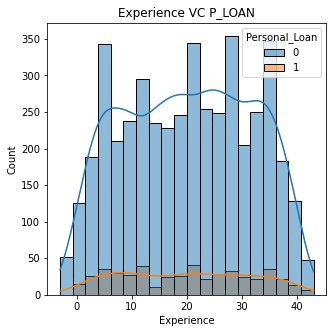

In [30]:
#set the figure
plt.figure(figsize=(5,5))
#plot a boxplot
sns.histplot(data=df, x='Experience', hue='Personal_Loan', kde=True)
plt.title("Experience VC P_LOAN")

In [31]:
def bivariate_cat_plot(data, feature, hue="Personal_Loan", figsize=(7,6)):
    """
    plots a bivariate categorical plot for specified feature categorized by the specified hue.
    
    data: dataframe
    feature: x column feature
    hue:hue
    """
    plt.figure(figsize=figsize)  #set the figsize
    sns.catplot(data=data, x=feature, hue=hue ,kind="count"); #plot the count plot
    plt.title(feature + " categorized by "+ hue)  #set the title
    plt.show()


<Figure size 504x432 with 0 Axes>

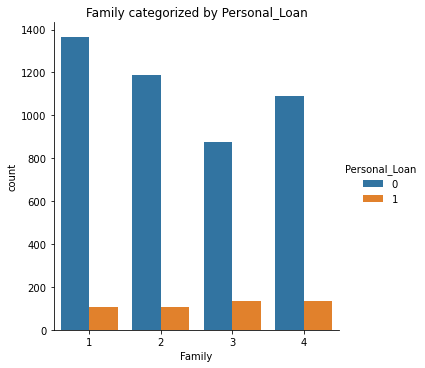

In [32]:
bivariate_cat_plot(data=df, feature='Family', hue="Personal_Loan")

- this shows that people with more family members accepted the loan. maybe as a result of higher family expenses

In [33]:
df.groupby("Personal_Loan")['Family'].value_counts()

Personal_Loan  Family
0              1         1365
               2         1190
               4         1088
               3          877
1              4          134
               3          133
               1          107
               2          106
Name: Family, dtype: int64

<Figure size 504x432 with 0 Axes>

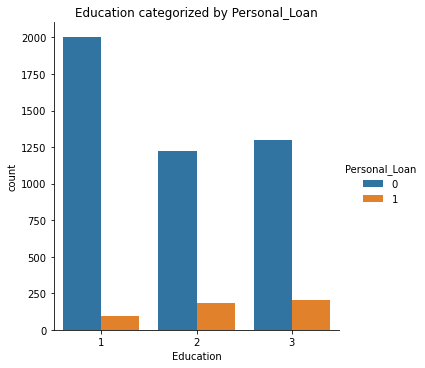

In [34]:
bivariate_cat_plot(df, 'Education');

- this shows that people with higher education accepted the loan.

In [35]:
df[df['Education']==3].groupby('Personal_Loan')['Age'].unique()[0]

array([50, 65, 48, 60, 57, 40, 56, 59, 53, 30, 31, 51, 38, 29, 41, 58, 46,
       27, 25, 35, 66, 33, 39, 54, 52, 32, 44, 55, 47, 43, 62, 26, 49, 34,
       45, 42, 36, 63, 24, 64, 61, 28, 37, 67])

Text(0.5, 1.0, 'CCAvg VC P_LOAN')

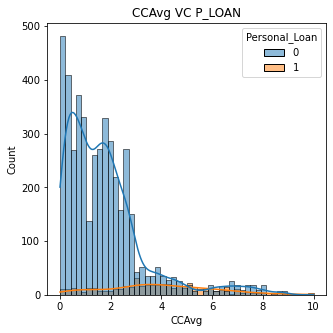

In [36]:
#set the figure
plt.figure(figsize=(5,5))
#plot a boxplot
sns.histplot(data=df, x='CCAvg', hue='Personal_Loan', kde=True)
plt.title("CCAvg VC P_LOAN")

- this shows mainly two things
- 1. people with higher credit card spendings are little compared to customers with lower ccavg.
- 2. more customers with higher average spending on credit card (3-10) accpeted the personal_loan.

what is the education level of people with CCAvg values between 3-10?

In [37]:
df.query("CCAvg >= 3").describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,902.0,44.106430,10.865630,23.000000,35.000000,43.000000,53.000000,65.000000
Experience,902.0,19.011086,10.799345,-3.000000,10.000000,19.000000,27.000000,41.000000
Family,902.0,2.113082,1.050588,1.000000,1.000000,2.000000,3.000000,4.000000
CCAvg,902.0,4.967838,1.607589,3.000000,3.700000,4.500000,6.200000,10.000000
Education,902.0,1.662971,0.842505,1.000000,1.000000,1.000000,2.000000,3.000000
Mortgage,902.0,79.711752,141.034709,0.000000,0.000000,0.000000,133.750000,635.000000
Personal_Loan,902.0,0.368071,0.482548,0.000000,0.000000,0.000000,1.000000,1.000000
Securities_Account,902.0,0.113082,0.316869,0.000000,0.000000,0.000000,0.000000,1.000000
CD_Account,902.0,0.138581,0.345700,0.000000,0.000000,0.000000,0.000000,1.000000
Online,902.0,0.595344,0.491098,0.000000,0.000000,1.000000,1.000000,1.000000


- 

<AxesSubplot:xlabel='CCAvg', ylabel='Count'>

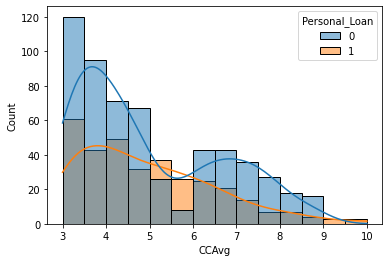

In [38]:
sns.histplot(data=df.query("CCAvg >= 3"), x='CCAvg', hue='Personal_Loan', kde=True,)


- this shows that more customers with CCAvg of 5-6, 9-10 accepted the loan

In [39]:
df.columns

Index(['Age', 'Experience', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard', 'log_Income'],
      dtype='object')

Text(0.5, 1.0, 'Mortgage VC P_LOAN')

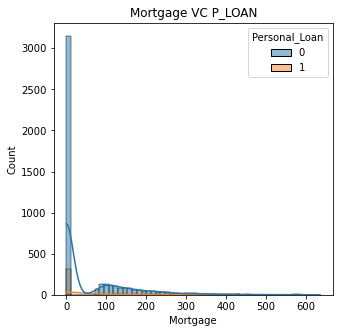

In [40]:
#set the figure
plt.figure(figsize=(5,5))
#plot a boxplot
sns.histplot(data=df, x='Mortgage', hue='Personal_Loan', kde=True)
plt.title("Mortgage VC P_LOAN")

In [41]:
def numerical_bivariate_histplot(data, feature, hue, figsize=(5,5), kde=False):
    """
    plot a histplot of the feature categorized by the hue
    data:dataframe
    feature: x variable
    hue:hue
    figsize: size of the plot
    
    """
    plt.figure(figsize=figsize)#set the figure size
    #plot the histogram
    sns.histplot(data=data, x=feature, hue=hue, kde=kde)
    plt.title(feature +" categorized by " + hue)

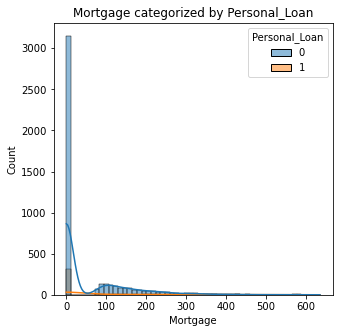

In [42]:
numerical_bivariate_histplot(data=df,feature='Mortgage', hue='Personal_Loan', kde=True)

- this shows that even customers that didnt have mortgage accepted the loan offer.


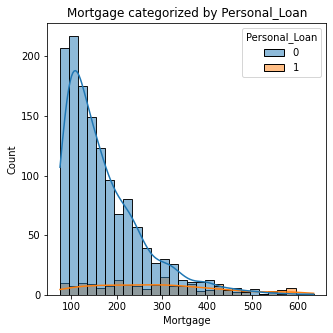

In [43]:
numerical_bivariate_histplot(data=df.query("Mortgage > 1"),feature='Mortgage', hue='Personal_Loan', kde=True)

- the higher the value of mortgage the lower the number of customers that have such facility.
- relative to people that do not have mortgage, more customers with mortgage accepted the loan. more people with mortgage value close to 600, accepted the loan.

<Figure size 504x432 with 0 Axes>

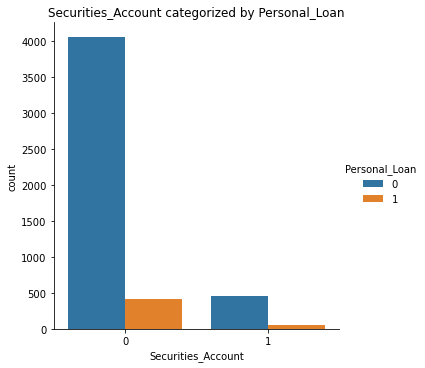

In [44]:
bivariate_cat_plot(data=df, feature='Securities_Account', hue='Personal_Loan',)

- most of the customers do not have security account
- in terms of relativity, people that have security account have a higher tendency of accepting the loan offer.

<Figure size 504x432 with 0 Axes>

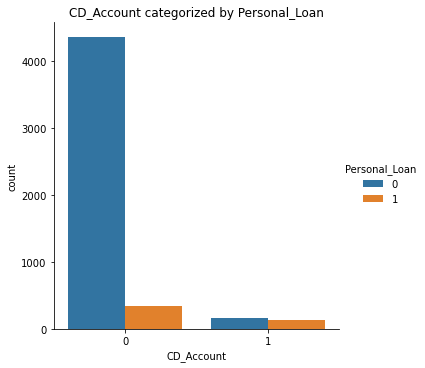

In [45]:
bivariate_cat_plot(data=df, feature='CD_Account', hue='Personal_Loan',)

- only a fewer number of customers have certificate of deposit with the bank.
- the chart suggests that customers with CD_account have higher tendency of accepting the loan.

## insight
- what are the advantages of having a CD_Account? it is possible that having more customers with cd_account raises the chances of selling these loans

<Figure size 504x432 with 0 Axes>

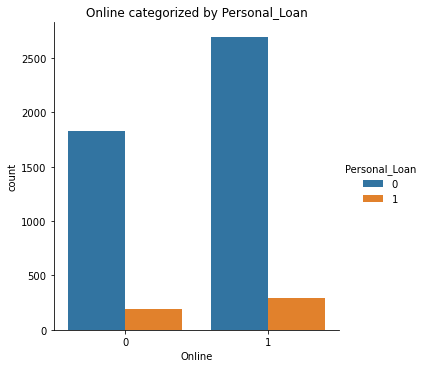

In [46]:
bivariate_cat_plot(data=df, feature='Online')


- the proportion of customers that make us the online banking channels of the bank is higher than those that do not.
- both subcategories have proportions of people that accepted the loan

<Figure size 504x432 with 0 Axes>

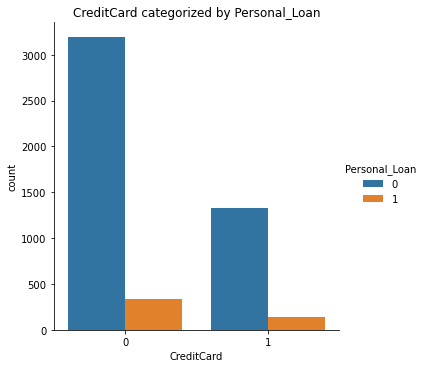

In [47]:
bivariate_cat_plot(data=df, feature='CreditCard')

- a higher number of customers do not have a creditcard issued by another bank.
- relative to customers that use our creditcard, a higher proportion of customers that use creditcard from another bank accepted the loan.

could that be an indicator that our bank has a competive interest rate?

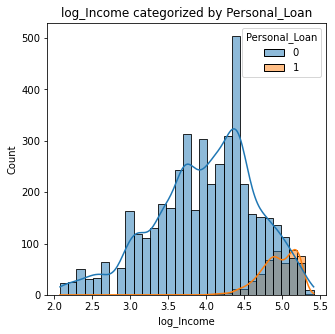

In [48]:
numerical_bivariate_histplot(data=df, feature='log_Income', hue="Personal_Loan", kde=True)

- this suggests that the higher the income of an individual, the higher the tendency  of them accepting the loan because more people with higher income accepted the loan offer.

## insight
- either we solely focus on people with high income to purchase these loans or we reduce the principal, the interest rate and increase the maturity period to encourage lower earners to accept the loan

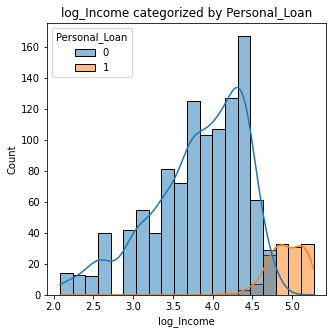

In [49]:
numerical_bivariate_histplot(data=df.query("Family == 4"), feature='log_Income', hue="Personal_Loan", kde=True)

- this suggests that we can target high income earners with larger family size as they have showed to accept the loan a lot more than any other subcategory

# EDA Summary
- there are no duplicated rows and missing values.
- there are 5000 rows and 14 columns
- columns Age and Experience were uniformly distributed while income was right-skewed and was log_transformed
- the distribution of CCAvg and Mortgage were right skewed but it was not transformed because doing a log transformation will result in negative values
- Experience feature is shown to have high +ve correlation with age and should be dropped also it has negative values which can not be. so befor it is used in other models different from logistics regression, these negative values will be changed to zero.



# Data Cleaning

In [50]:
#index for rows that has negative values for experience column
index = df[df.Experience < 0].index

In [51]:
df = df.drop(index=index)

In [52]:
df[df.Experience < 0]

,Age,Experience,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,log_Income


In [53]:
#make a copy of the data
data = df.copy()

### treat Mortgage
- the EDA showed that 75% of the people in the dataset didnt have mortgage
- some of the other values will act as outliers and will most likely affect the performance of the Logistic model.
- for the purpose of logistic regression i will create 2 categories namely:
    - class A people without mortgage
    - class B1: people with mortgage 
- then i will create dummy variables for the columns. The trade off is addition of more columns.

In [54]:
listed = []
#iterate through the entire row
for i in range(data.shape[0]):
    mortgage = data['Mortgage'].values[i]
    
    #if the customer have mortgage
    if mortgage == 0:
        listed.append("class_A")
    #if customer does not have mortgage
    elif mortgage > 0:
        listed.append("class_B")

data.Mortgage = [i for i in listed]

In [55]:
data

,Age,Experience,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,log_Income
0,25,1,4,1.6,1,class_A,0,1,0,0,0,3.891820
1,45,19,3,1.5,1,class_A,0,1,0,0,0,3.526361
2,39,15,1,1.0,1,class_A,0,0,0,0,0,2.397895
3,35,9,1,2.7,2,class_A,0,0,0,0,0,4.605170
4,35,8,4,1.0,2,class_A,0,0,0,0,1,3.806662
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,1,1.9,3,class_A,0,0,0,1,0,3.688879
4996,30,4,4,0.4,1,class_B,0,0,0,1,0,2.708050
4997,63,39,2,0.3,3,class_A,0,0,0,0,0,3.178054
4998,65,40,3,0.5,2,class_A,0,0,0,1,0,3.891820


# Data Modeling

In [56]:
data = pd.get_dummies(data=data, drop_first=True)
data

,Age,Experience,Family,CCAvg,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,log_Income,Mortgage_class_B
0,25,1,4,1.6,1,0,1,0,0,0,3.891820,0
1,45,19,3,1.5,1,0,1,0,0,0,3.526361,0
2,39,15,1,1.0,1,0,0,0,0,0,2.397895,0
3,35,9,1,2.7,2,0,0,0,0,0,4.605170,0
4,35,8,4,1.0,2,0,0,0,0,1,3.806662,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,1,1.9,3,0,0,0,1,0,3.688879,0
4996,30,4,4,0.4,1,0,0,0,1,0,2.708050,1
4997,63,39,2,0.3,3,0,0,0,0,0,3.178054,0
4998,65,40,3,0.5,2,0,0,0,1,0,3.891820,0


### select feature and target

In [57]:
y = data['Personal_Loan']

X = data.drop(["Personal_Loan","Experience" ], axis = 1)

In [58]:
#split the data into train, validation and test data


x_train_V, x_test, y_train_V, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x_train_V, y_train_V, test_size=0.2, stratify=y_train_V, random_state=0)

In [59]:
# normalize the data

#initialize the scaler
scaler = StandardScaler()

#scale the features
x_train_sc = scaler.fit_transform(x_train)

x_val_sc = scaler.transform(x_val)
x_test_sc = scaler.transform(x_test)

# cross validation
- the purpose of doing cross validation at this stage is to have an overview of the expected precision of the model.

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
#instantiate the logistic regression
log_reg = LogisticRegression(random_state=0)

#peform a 5-k-fold cross validation and return the recall for each split
score = cross_val_score(log_reg, x_train_sc, y_train, cv=5, scoring='precision', n_jobs=-1)

#return the average of the scores
#np.mean(score)
score

array([0.87272727, 0.8       , 0.84090909, 0.89130435, 0.81818182])

# Logistic Regression

# create training and evaluation pipelines

In [62]:
def model_trainer(algorithm, X, y):
    """
    trains the model with given parameters
    algorithm: algorithm
    X: x_train scaled
    y = target
    """
    trained_model = algorithm.fit(X, y) #train the algorithm
    
    prediction = trained_model.predict(X)  #making prediction on the train data
    
    acc = accuracy_score(y, prediction)  #make predictions
    #print(f"train accuracy : {acc}")  #print accuracy
    print("train accuracy : {:.3f}".format(acc))
    return trained_model   #return trained model
#define another pipeline to evaluate the model and compute metrics on test data

def model_evaluator(model, X, y, threshold = 0.5, probability = False):
    """
    evaluate the model based on it is metrics
    model : trained model
    X : test data scaled or scaled validation data
    y : test target
    threshold: float, describes the degree of strictness with probability. any probability < threshold equals to 0
    probability : boolean, if True predict probability of occurence else preidct0 or 1
    """
    
    #make prediction
    #predict probability for each row
    pred_proba = model.predict_proba(X)[:,1]   #subset all the rows of second column
    pred_class = np.round(pred_proba > threshold)  #create a class of either 1 or 0 for each row
    
    #calcilate recall
    recall = recall_score(y, pred_class)
    
    
    #calculate precision
    precision = precision_score(y, pred_class)
    
    #calculate accuracy
    acc = accuracy_score(y, pred_class)
    
    #f1 score
    f1 = f1_score(y, pred_class)
    
    df = pd.DataFrame({"Accuracy" : acc,
                      "Recall" : recall,
                      "Precision" : precision,
                      "f1" : f1}, index = [0])
    #compute confusion matrix
    confusion = confusion_matrix(y, pred_class, labels=[0,1])
    
    #plot confusion matrix
    confusion_display = ConfusionMatrixDisplay(confusion, display_labels=[0,1])
    #plot the matrix
    confusion_display.plot()
    plt.show()
    
    #show the metrics
    return df



train accuracy : 0.956


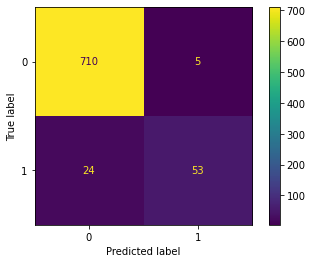

,Accuracy,Recall,Precision,f1
0,0.963384,0.688312,0.913793,0.785185


In [63]:
log_reg = LogisticRegression(random_state=0)

log_reg_model = model_trainer(log_reg, x_train_sc, y_train)

log_reg_mdf = model_evaluator(log_reg_model, x_val_sc, y_val)
log_reg_mdf

## Model performance evaluation
- confusion matrix explained
    - based on the validation set, 715 people turned down the loan offer, however, the model predicted that 710 out of this 715 correctly refused the offer and misclassified the other 5 as though they accepted the offer.
    - 53 people out of 77 people in the data set that accepted the offer were accurately predicted. 24 were misclassified to have rejected the offer.
    - based on the prediction, 53 out of 58 people predicted to accept the loan truly accepted the loan. however, 5 people were wrongly predicted to reject the loan.
    
- Metric explained:
- Accuracy:
    - this means that 96.3% of the total predictions were accurate and given a dataset of similar variation, the model will accurately predict between the two classes 96% of the time.
- Recall:
    - this means that only 68.8% of people that actually accepted the loan in the data were accurately predicted.
- Precision:
    - this means that 91.4% of the people that the model predicted to accept the loan actually accepted the loan.
    
- The goal of this project is to correctly classify the customers that have higher chances of accepting the loan offer. if we optimize the recall, i.e reducing the error the model makes in classifying people that will likely accept the loan as people that won't, the model will make more error in incorrectly classifying people that won't accept the offer as people that would. Hence, the marketers or retail officers, will spend more efforts in marketing the offer to people that have higher chances of turning down the offer.
- Because of this reason, optimizing the precision is best suited for the KPI. even though the model will mis-classify some people that will accept the model as those that won't, it will make lesser error at mis-classifying people that wont accept the loan offer. We want a situation whereby any customer the model predicts to accept the loan offer will most likely accept it.

## Logistics Model improvement
- using the hyper-parameters

**********
using the  NEWTON-CG solver
train accuracy : 0.956


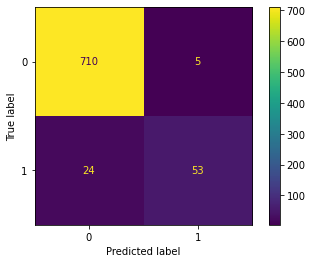

   Accuracy    Recall  Precision        f1
0  0.963384  0.688312   0.913793  0.785185
**********
using the  SAG solver
train accuracy : 0.956


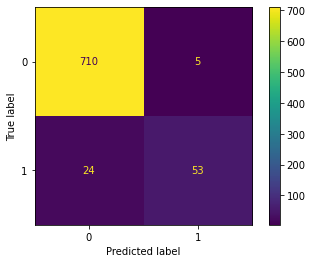

   Accuracy    Recall  Precision        f1
0  0.963384  0.688312   0.913793  0.785185
**********
using the  LBFGS solver
train accuracy : 0.956


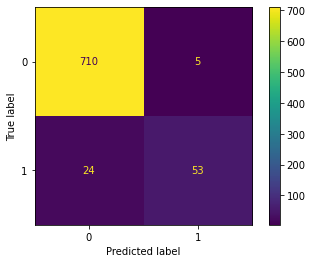

   Accuracy    Recall  Precision        f1
0  0.963384  0.688312   0.913793  0.785185


In [64]:
solvers = ['newton-cg', 'sag', 'lbfgs']
for i in solvers:
    print("*" * 10)
    print("using the ", i.upper(), "solver")    
    log_reg_imp = LogisticRegression(random_state=0, solver=i)
    log_reg_imp_M = model_trainer(log_reg_imp, x_train_sc, y_train)
    log_reg_imp_Mdf = model_evaluator(log_reg_imp_M, x_val_sc, y_val)
    print(log_reg_imp_Mdf)

- this shows that using the 'l2' penalty and the following solvers: 'newton-cg', 'sag', 'lbfgs', gave the exact same result as the initial model.
- confusion matrix explained
    - based on the validation set, 715 people turned down the loan offer, however, the model predicted that 710 out of this 715 correctly refused the offer and misclassified the other 5 as though they accepted the offer.
    - 53 people out of 77 people in the data set that accepted the offer were accurately predicted. 24 were misclassified to have rejected the offer.
    - based on the prediction, 53 out of 58 people predicted to accept the loan truly accepted the loan. however, 5 people were wrongly predicted to reject the loan.
    
- Metric explained:
- Accuracy:
    - this means that 96.3% of the total predictions were accurate and given a dataset of similar variation, the model will accurately predict between the two classes 96% of the time.
- Recall:
    - this means that only 68.8% of people that actually accepted the loan in the data were accurately predicted.
- Precision:
    - this means that 91.4% of the people that the model predicted to accept the loan actually accepted the loan.

**********
using the  LIBLINEAR solver
train accuracy : 0.956


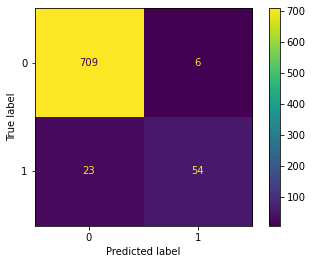

   Accuracy    Recall  Precision        f1
0  0.963384  0.701299        0.9  0.788321
**********
using the  SAGA solver
train accuracy : 0.956


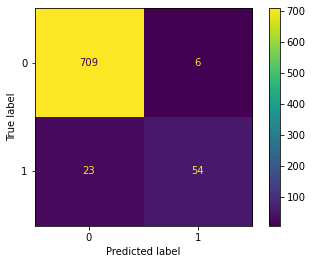

   Accuracy    Recall  Precision        f1
0  0.963384  0.701299        0.9  0.788321


In [65]:
solvers = ['liblinear' , 'saga']
for i in solvers:
    print("*" * 10)
    print("using the ", i.upper(), "solver")
    log_reg_imp = LogisticRegression(penalty='l1',random_state=0,solver=i)
    log_reg_imp_M = model_trainer(log_reg_imp, x_train_sc, y_train)
    log_reg_imp_Mdf = model_evaluator(log_reg_imp_M, x_val_sc, y_val)
    print(log_reg_imp_Mdf)

- using the 'l1' penalty and accepted solvers: 'Liblinear' and 'saga' gave a different result.
- the model optimized the recall and lowered the precision.
- this model will not perform better than the l2-norm models at classifying customers that have higher tendency of accepting the loan. Because out of 60 people classifed as having higher tendency of accepting the loan, it predicted 6 incorrectly, while the previous models misclassified 5.

## optimal c value

Text(0, 0.5, 'precision values')

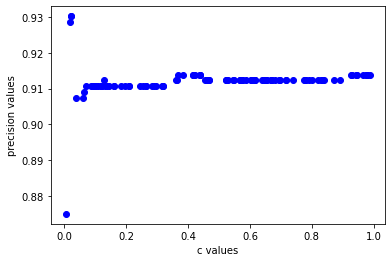

In [66]:
prec_scores = []

np.random.seed(0)
c_val = np.random.rand(50,2).reshape(1,100).flatten()

for i in c_val:
    log_reg_imp = LogisticRegression(random_state=0, C=i)
    
    log_reg_imp_M = log_reg_imp.fit(x_train_sc, y_train)
    
    pred = log_reg_imp_M.predict(x_val_sc)
    prec = precision_score(y_val, pred)
    
    prec_scores.append(prec)
    

plt.plot(c_val, prec_scores, 'bo')
plt.xlabel("c values")
plt.ylabel("precision values")

## get the optimal c value for the model

In [67]:
#the index of the c_value that gave the maximum value of precision
optimal_c_index = np.argmax(prec_scores)


optimal_c = c_val[optimal_c_index]

## rebuild the model using the optimal c-value

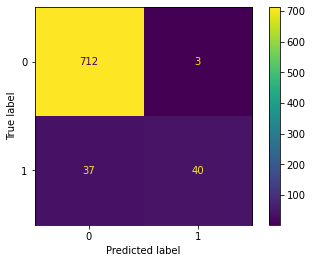

,Accuracy,Recall,Precision,f1
0,0.949495,0.519481,0.930233,0.666667


In [68]:
#instantiate the algorithm
log_reg_imp = LogisticRegression(random_state=0, C=optimal_c)

#fit the model
log_reg_imp_M = log_reg_imp.fit(x_train_sc, y_train)

log_reg_imp_Mdf = model_evaluator(log_reg_imp_M, x_val_sc, y_val)
log_reg_imp_Mdf

- this model shows better precision value. 
### confusion matrix explained
- the model predicts 43 people to be accept the loan, 3 out of these people actually rejected the loan offer.
- the model also predicted that 749 people didnt accept the loan. however, 37 people did.

- Accuracy:
    - the accuracy score of 94.95% means that the ratio of the total correct predictions to the total number of predictions is 94.95% or simply put, 94.95% of the total predictions were correct.
    
- Recall:
    - the recall value indicates that only 51.9% of the customers that accepted the loan offer in the data were correctly classified.
    
- Precision:
    - precision score indicates that 93% of the predictions for customers that will accept the loan were correct.

## optimizing the class weight
- the data is imbalanced. As a result of this, the model will likely focus more on the predominat class and categorize them more accurately. Balancing the class weight is a way to reduce the effect of imbalance in the data. However, this will most likely help at increasing the recall of the model.

In [69]:
y_val.value_counts(normalize=True)

0    0.902778
1    0.097222
Name: Personal_Loan, dtype: float64

- this shows that the data is imbalanced.

train accuracy : 0.884


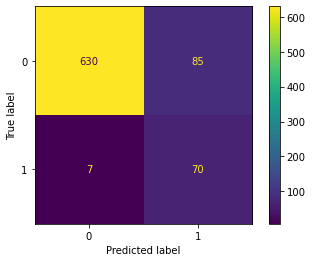

,Accuracy,Recall,Precision,f1
0,0.883838,0.909091,0.451613,0.603448


In [70]:
log_reg_imp = LogisticRegression(random_state=0, C=optimal_c, class_weight='balanced')

log_reg_imp_M = model_trainer(log_reg_imp, x_train_sc, y_train)

log_reg_imp_Mdf = model_evaluator(log_reg_imp_M, x_val_sc, y_val)
log_reg_imp_Mdf

- placing more weights on the positive class (1), the model performed well at correctly identifying the positives in tha data thereby reducing the false negative hence the recall was optimized. in the model's prediction however, 85 people that did not accept the loan were classified as positives (people who will accept the loan).
- The negative effect this might have is that, although more customers will be classified as people who can accept the loan, a portion of them will not accept the loan(false positives),  meanwhile efforts would have been made by the marketing team to target these customers. This proportion of misclassified negatives (false positives) would have been smaller if we optimized the precision of the model instead.

- hence, this model will not be a good fit at optimizing the desired KPI

## balancing the data
- Adasyn over sampling technique

- instead of tweaking the class weight, an oversampling technique might be better, however, a similar result from balancing the class weight is expected 

In [71]:
from imblearn.over_sampling import ADASYN

In [72]:
def balance_data(smote_type, X, y):
    """
    returns a balanced training data X and y
    smote_type : smote type or strategy
    X: feature
    y: target
    """
    x_res, y_res = smote_type.fit_resample(X,y)
    return x_res, y_res

In [73]:
#instantiate the smote type
ada = ADASYN(random_state=0)

#balance the data
x_res, y_res = balance_data(ada, x_train_sc, y_train)

In [74]:
y_res.value_counts(normalize=True)

0    0.501403
1    0.498597
Name: Personal_Loan, dtype: float64

- the data is approximately balanced

## train the model using the resampled train data and target

train accuracy : 0.898


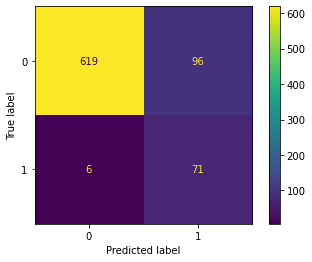

,Accuracy,Recall,Precision,f1
0,0.871212,0.922078,0.42515,0.581967


In [75]:
log_reg_imp = LogisticRegression(random_state=0, C=optimal_c)

log_reg_imp_M = model_trainer(log_reg_imp, x_res, y_res)

log_reg_imp_Mdf = model_evaluator(log_reg_imp_M, x_val_sc, y_val)

log_reg_imp_Mdf

- as expected, balancing the data has helped in optimizing the recall of the model and reducing the precision. 
- 96 people that rejected the loan offer were incorrectly classified as people that would accept the loan.

## model improvement using the threshold
- prior to this time, all improvement methods have been done at a threshold of 0.5
- this means that only customers that has a probability > 0.5 of accepting the offer will be categorized as positives (1). 
- increasing this threshold to 0.6 will mean that, we want the model to classify only customers that have a 60% chance of accepting the loan as those that will accept the loan.
- this will lower the number of false positives because only a larger number of postivies will be categorized however, some of the positives will be classified as false negatives. hence, precision will be optimized and recall reduced.

train accuracy : 0.938


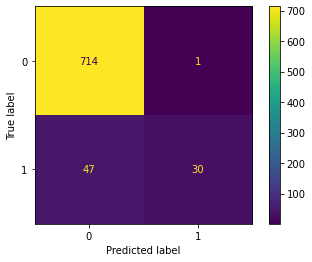

,Accuracy,Recall,Precision,f1
0,0.939394,0.38961,0.967742,0.555556


In [76]:
log_reg_imp = LogisticRegression(random_state=0, C=optimal_c)
log_reg_imp_M = model_trainer(log_reg_imp, x_train_sc, y_train)

log_reg_imp_Mdf = model_evaluator(log_reg_imp_M, x_val_sc, y_val, threshold=0.60)
log_reg_imp_Mdf

- the confusion matrix of this model shows that out 31 people, predicted to accept our loan, only 1 person didnt accept it. it has 96.8% precision.
- the negative aspect of this model is that only a small proportion of the customers will be predicted to accept the loan because a number of them are classified as false negatives (customers that can accept the loan but classifed as though they will refuse the loan.)

train accuracy : 0.956


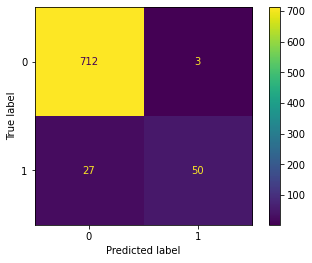

,Accuracy,Recall,Precision,f1
0,0.962121,0.649351,0.943396,0.769231


In [77]:
log_reg_imp = LogisticRegression(random_state=0)
log_reg_imp_M = model_trainer(log_reg_imp, x_train_sc, y_train)

log_reg_imp_Mdf = model_evaluator(log_reg_imp_M, x_val_sc, y_val, threshold=0.60)
log_reg_imp_Mdf

- removing the optimal c value improved the model as follows:
- the confusion matrix shows that out of 53 people that were predicted to accept the loan offer, only 3 people actually refused it.
- however, this model is better than using the optimal c value because some of the false negatives (customers that can accept the loan but classifed as though they will refuse the loan) were correctly classified. 

### explaining the coefficients

In [88]:
coefficient = pd.DataFrame(data=log_reg_imp_M.coef_, columns=X.columns )
coefficient

,Age,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard,log_Income,Mortgage_class_B
0,0.128944,0.8363,0.185764,1.418274,-0.250537,0.852776,-0.376752,-0.488796,4.39515,0.158983


- Age;
    - the coefficient of age means that for every increase in the age, holding other parameters constant, the odds of that customer to accept the loan offer increases by 0.13.

- log_income:
    - the coefficient of log_income means that for every increase in income of a customer, the odds that the cusotmer accepts the loan increases by 3.95. (log_income is already on a log scale and this factors out the logarithm on the logit (log of odds), leaving the odds.
    
    
 log(a/b) = log(income) (holding other parameters constant and a/b is the odd)
- a/b = income

# implementing manual grid search

In [89]:
from sklearn.linear_model import LogisticRegression
l1_solvers = ['liblinear','saga'] #define l1 solvers
l2_solvers = ['liblinear', 'saga', 'newton-cg', 'sag', 'lbfgs', 'newton-cholesky'] #define l2 solvers
np.random.seed(0)  #avoid changing values
C = np.random.rand(2,10).reshape(20,1).flatten() #for 20 different values of c
best_score_l1 = 0
best_score_l2 = 0
for pen in ['l1', 'l2']:
    if pen == 'l1': #if penalty is l1
        for solve in l1_solvers: #use different l1 solvers
            for c in C: #use the different values of c
                log_reg = LogisticRegression(penalty=pen,solver=solve, C=c, random_state=0) #instantiate the algorithm
                log_reg_m = log_reg.fit(x_train_sc, y_train) #train the algorithm
                pred = log_reg_m.predict(x_val_sc) #make predictions
                prec = precision_score(y_val, pred) #return the precision value
                #print(prec)

                if prec > best_score_l1:
                    best_score_l1 = prec
                    best_l1_parameters = {"penalty": pen, "solver": solve, "c value": c, "precision":prec}
    elif pen == 'l2':
        for solve in l2_solvers:
            for c in C:
                log_reg = LogisticRegression(penalty=pen,solver=solve, C=c, random_state=0 , n_jobs=-1)
                log_reg_m = log_reg.fit(x_train_sc, y_train)
                pred = log_reg_m.predict(x_val_sc)
                prec = precision_score(y_val, pred)        
                #print(prec)
            if prec > best_score_l2:
                best_score_l2 = prec
                best_l2_parameters = {"penalty": pen, "solver": solve, "c value": c, "precision":prec}

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got '

In [90]:
best_l2_parameters

{'penalty': 'l2',
 'solver': 'liblinear',
 'c value': 0.8700121482468192,
 'precision': 0.9137931034482759}

In [91]:
best_l1_parameters

{'penalty': 'l1',
 'solver': 'saga',
 'c value': 0.02021839744032572,
 'precision': 0.9534883720930233}

- the above hyper-parameters are the values of each parameter that will return the best optimized value for precision using the l2 and l1 penalty respectively.

# implementing Gridsearchcv

- to avoid warning due to incompatibility of solver and penalty, i will do a gridsearch for the 2 different penalty

### gridsearch using l2 penalty

In [92]:
#import the module
from sklearn.model_selection import GridSearchCV

#instantiate the regression model
log_reg_imp = LogisticRegression(random_state=0)

#set the range of hyper-parameters
np.random.seed(0)
param_grid = {'penalty':['l2'],'solver': ['liblinear', 'saga', 'newton-cg', 'sag', 'lbfgs', 'newton-cholesky'],
             'C' : list(np.random.rand(2,10).reshape(20,1).flatten())}

#instantiate the gridsearch
GS =  GridSearchCV(log_reg_imp, param_grid=param_grid, scoring='precision',cv=5, n_jobs=-1)

#fit gs on the train sets
GS.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.5488135039273248, 0.7151893663724195,
                               0.6027633760716439, 0.5448831829968969,
                               0.4236547993389047, 0.6458941130666561,
                               0.4375872112626925, 0.8917730007820798,
                               0.9636627605010293, 0.3834415188257777,
                               0.7917250380826646, 0.5288949197529045,
                               0.5680445610939323, 0.925596638292661,
                               0.07103605819788694, 0.08712929970154071,
                               0.02021839744032572, 0.832619845547938,
                               0.7781567509498505, 0.8700121482468192],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'saga', 'newton-cg', 'sag',
                                    'lbfgs', 'newton-cholesky']},
             scoring='precision')

In [93]:
GS.best_params_

{'C': 0.07103605819788694, 'penalty': 'l2', 'solver': 'saga'}

In [94]:
GS.best_score_

0.9152428698752229

### gridsearch using l1 penalty

In [95]:
#import the module
from sklearn.model_selection import GridSearchCV

#instantiate the regression model
log_reg_imp = LogisticRegression(random_state=0)

#set the range of hyper-parameters
np.random.seed(0)
param_grid = {'penalty':['l1'],'solver': ['liblinear', 'saga'],
             'C' : list(np.random.rand(2,10).reshape(20,1).flatten())}

#instantiate the gridsearch
GS =  GridSearchCV(log_reg_imp, param_grid=param_grid, scoring='precision',cv=5, n_jobs=-1)

#fit gs on the train sets
GS.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.5488135039273248, 0.7151893663724195,
                               0.6027633760716439, 0.5448831829968969,
                               0.4236547993389047, 0.6458941130666561,
                               0.4375872112626925, 0.8917730007820798,
                               0.9636627605010293, 0.3834415188257777,
                               0.7917250380826646, 0.5288949197529045,
                               0.5680445610939323, 0.925596638292661,
                               0.07103605819788694, 0.08712929970154071,
                               0.02021839744032572, 0.832619845547938,
                               0.7781567509498505, 0.8700121482468192],
                         'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
             scoring='precision')

In [96]:
best_params = GS.best_params_

In [97]:
GS.best_score_

0.9378682698375794

## Rebuilding the logistic regression model using suggested hyper-parameters for l1 penalty. 
- this is because, using the l1 penalty has proven to give a higher precision value.
- i will increase the threshold to 0.55. This means that only customers with a a likelihood above 0.55 of accepting the loan offer will be classified. Thus the precision is expected to increase.

train accuracy : 0.942


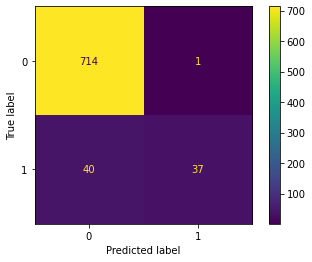

,Accuracy,Recall,Precision,f1
0,0.948232,0.480519,0.973684,0.643478


In [100]:
log_reg_imp = LogisticRegression(**best_params, random_state=0)

log_reg_imp_M = model_trainer(log_reg_imp, x_train_sc, y_train)

log_reg_imp_Mdf = model_evaluator(log_reg_imp_M, x_val_sc, y_val, threshold=0.55)
log_reg_imp_Mdf

- so far, this is the best model because it has the highest precision score.
- out of 38 people the model predicted to accept the loan, only 1 person did not accept it.
- the precision score indicates that 97.4% of the model's prediction for people who will accept the loan were correct.
- the recall however indicates that only 48% of the people able to accept the loan were correctly identified by the model.
- this means that not everybody that is able to accept the loan will be correctly classified by the model. however, those people the model identifies will have a very tendency of accepting the  loan offer.

## performance of Logistic model on Test data

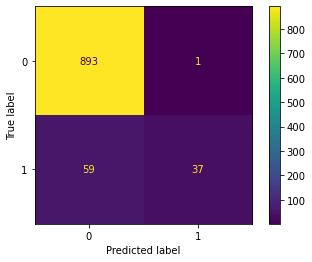

,Accuracy,Recall,Precision,f1
0,0.939394,0.385417,0.973684,0.552239


In [101]:
log_reg_imp_Mdf = model_evaluator(log_reg_imp_M, x_test_sc, y_test, threshold=0.55)
log_reg_imp_Mdf

- the metrics indicates that the model is generalizing well

# Tree Based Modelling

### scope of tree based modelling
- 1. implement decision tree and evaluate
- 2. plot the tree and evaluate important features
- 3. implement pre-prunning measure and evaluate
- 4. evalute the performance and important features
- 5. apply grid search hyper parameter optimization

### import relevant libraries

In [102]:
from sklearn.tree import DecisionTreeClassifier

- tree based models are not affected by assumptions of logistic regression such as multicollinearity, outliers, normalization or linearity.
- i will reload the dataset and use it

In [103]:
#path file is found
path = '/Users/user/Downloads/Loan_Modelling.csv'
#read the data
raw_data = pd.read_csv(path)

#view 5 rows of data
raw_data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [104]:
#make a copy of the data
data = raw_data.copy()

data = data.drop(labels=["ID","ZIPCode"], axis=1)
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


## select features and target

In [105]:
y = data.Personal_Loan #target
X = data.drop("Personal_Loan", axis = 1) #features

## implementing cross validation on decision tree model

In [164]:
#instantiate the tree model
dtree = DecisionTreeClassifier(random_state=0)

#peform a 5-k-fold cross validation and return the recall for each split
score = cross_val_score(dtree, X, y, cv=5, scoring='precision', n_jobs=-1)

#return the average of the scores

score
np.mean(score)

0.9054914656953856

- this indicates that the decision tree model will give an average likely precision value of 0.9

## split into train, validation and test set

In [108]:
#split the data into train, validation, test

from sklearn.model_selection import train_test_split
x_train_v, x_test, y_train_v, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x_train_v, y_train_v, test_size=0.2,
                                                 stratify=y_train_v, random_state=0)

## build tree model

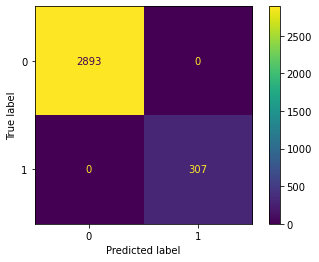

,Accuracy,Recall,Precision,f1
0,1.0,1.0,1.0,1.0


In [109]:
dtree = DecisionTreeClassifier(random_state=0)

dtree_M = dtree.fit(x_train, y_train)

dtree_Mdf = model_evaluator(dtree_M, x_train, y_train)
dtree_Mdf

- as expected, the model overfits. hence, i will try pre-prunning method by reducing the max_depth of the tree.
- the reason for overfiting is because the model tries to attain perfect leaf nodes by attaining 100% correct classification resulting in a very complex tree.

## plot the tree

In [110]:
from sklearn import tree


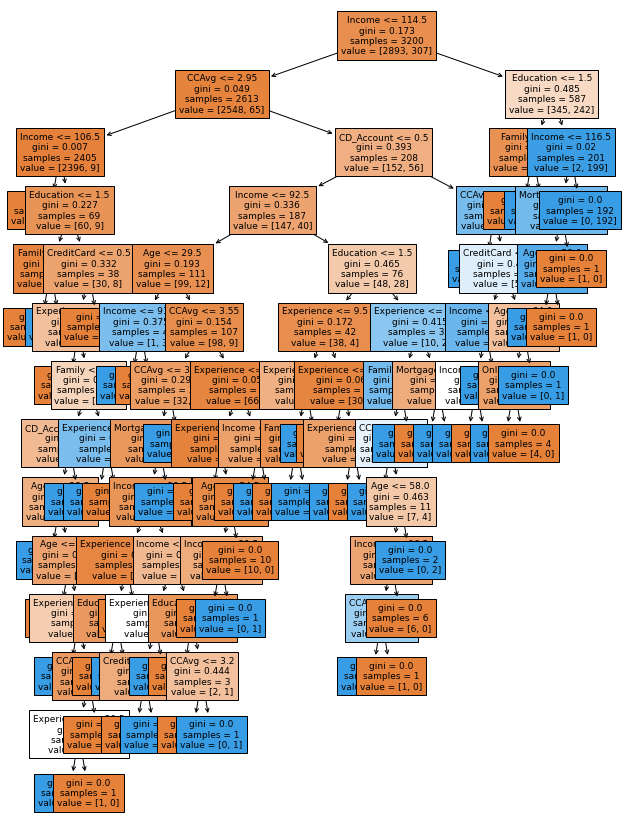

In [111]:
plt.figure(figsize=(10,15))
tree.plot_tree(decision_tree=dtree_M, feature_names=X.columns, filled=True, 
              fontsize=9)
plt.show()

## plot feature importance

In [114]:
def plot_feat_importances(model, X):
    """
    plots a horizontal barplot for the feature importance of the model
    model :  model
    X : x_train
    """
    #important features
    important_feat = model.feature_importances_
    #index of sorted important features
    ind = np.argsort(important_feat)
    
    plt.figure(figsize=(5,5))
    plt.barh(y = range(len(ind)), width=important_feat[ind])
    plt.title("Relative Feature Importances")
    plt.ylabel("Features")
    plt.yticks(ticks=range(len(ind)), labels=[x_train.columns[i] for i in ind])
    #x label
    plt.xlabel("Importance")

    plt.show()

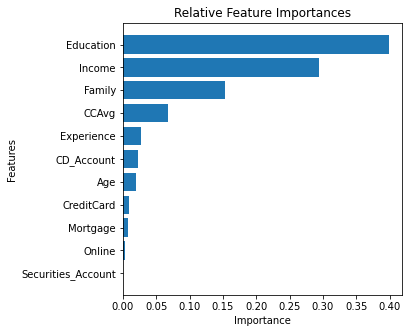

In [115]:
plot_feat_importances(dtree_M, x_train)

- the decision tree model considers Education, income, Family, CCAvg to be the most important features.
- it doesn't consider securites_account to be contributing to the model in a way.
- However, this model overfits, so before i drop any feature, i will reduce the max-depth of the tree and retrain the model

## pre-prunning
- using a max_depth of 4

In [116]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)

## implementing crossvalidation

In [163]:
#instantiate the tree model
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)

#peform a 5-k-fold cross validation and return the recall for each split
score = cross_val_score(dtree, X, y, cv=5, scoring='precision', n_jobs=-1)

#return the average of the scores

score
np.mean(score)

0.9649423579037423

- this indicates that better precision can be gotten from the pre-prunned model

train accuracy : 0.983


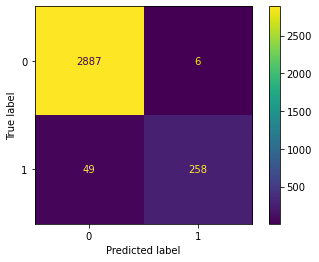

,Accuracy,Recall,Precision,f1
0,0.982812,0.840391,0.977273,0.903678


In [119]:
dtree_M = model_trainer(dtree, x_train, y_train)

dtree_Mdf = model_evaluator(dtree_M, x_train, y_train)
dtree_Mdf

- this model does not overfit on the train data.

- review performance on the validation data.

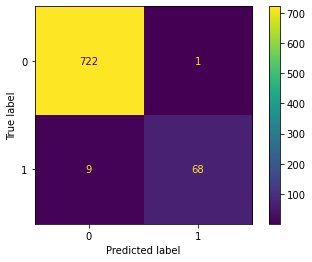

,Accuracy,Recall,Precision,f1
0,0.9875,0.883117,0.985507,0.931507


In [120]:
dtree_Mdf = model_evaluator(dtree_M, x_val, y_val)
dtree_Mdf

### explaining the confusion matrix
- based on the validation data, there were 723 people that did not accept the loan offer, the model misclassified 1 as though the customer accepted the loan offer.
- 77 customers in the validation data accepted the loan offer and only 68 of them were correctly classified.

- the Recall shows that only 88.3% of the customers that accepted the loan offer were identified.
- the precision shows that 98.5% of the custmers predicted to accepted the loan truly accept the loan.
- the F1 is 93.2%

# plot the tree

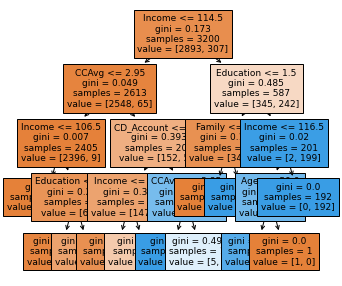

In [121]:
plt.figure(figsize=(5,5))
tree.plot_tree(decision_tree=dtree_M, feature_names=X.columns, filled=True, 
              fontsize=9)
plt.show()

- the tree is way shorter than the former because the maximum depth was shortened to 5.

### show relative importance

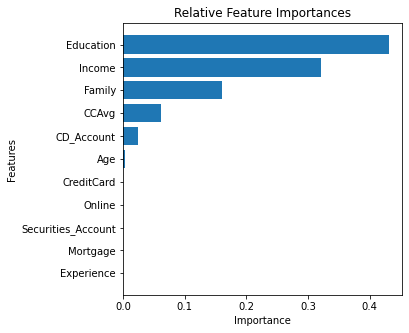

In [122]:
plot_feat_importances(dtree_M, x_train)

- the prunned model considers education, income, family, CCAvg as best contributors in making a decision.
- however, creditcard, online, sec_account, mortgage and experience has no contribution in helping the model make decision. 
- this could be as a result of the low depth of the tree.

# implementing GridSearchCV

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
dtree_gs = DecisionTreeClassifier(random_state=0)
GS = GridSearchCV(estimator=dtree_gs, param_grid={'criterion' : ["gini", "entropy", "log_loss"],
                                                 'splitter' : ["best", "random"], 'max_depth': [4,5,6]}, 
                  cv=5, n_jobs=-1, scoring='precision')
GS.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='precision')

In [125]:
best_params = GS.best_params_
best_params

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [128]:
GS.best_score_

0.9565229532991406

## retrain using the best parameters

In [126]:
dtree_gs = DecisionTreeClassifier(**best_params, random_state=0)

train accuracy : 0.987


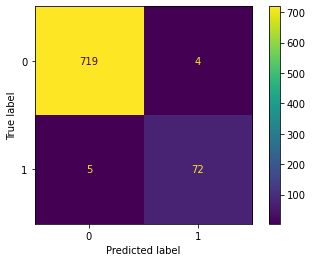

,Accuracy,Recall,Precision,f1
0,0.98875,0.935065,0.947368,0.941176


In [127]:
dtree_gs_M = model_trainer(dtree_gs, x_train, y_train)

dtree_gs_Mdf = model_evaluator(dtree_gs_M, x_val, y_val)
dtree_gs_Mdf

- the precision derived from GridSearchCv is lesser than the precision of the pre-prunned model.
- GRidsearch suggested "entropy" for best criterion while 'gini' was used for the pre-prunned model.


## plotting feature importance

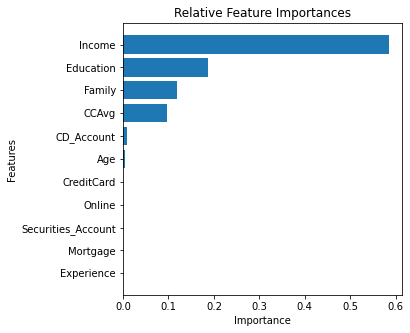

In [131]:
plot_feat_importances(dtree_gs_M, x_train)


- both models considers similar features to be important.

## increasing the threshold of the pre-prunned model to 0.55
- this means that only customers that have more than a 55% chance of accepting the loan are categorized for target marketing.

train accuracy : 0.983


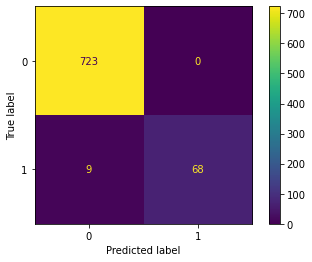

,Accuracy,Recall,Precision,f1
0,0.98875,0.883117,1.0,0.937931


In [132]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)

dtree_M = model_trainer(dtree, x_train, y_train)

dtree_Mdf = model_evaluator(dtree_M, x_val, y_val, threshold=0.55)
dtree_Mdf

- all the customers predicted to accept the loan by the model truly accepted the loan. Hence the precision is 100%.
- however, only 88.3% of the total customers in the validation data that accepted the loan were classified correctly by the model.
- the f1 is 93.8.
## performance on test set

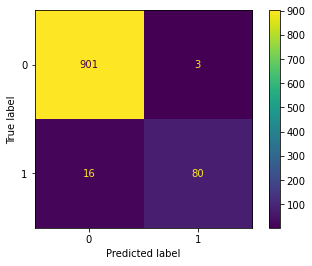

,Accuracy,Recall,Precision,f1
0,0.981,0.833333,0.963855,0.893855


In [133]:
dtree_Mdf = model_evaluator(dtree_M, x_test, y_test, threshold=0.55)
dtree_Mdf

- a similar range of metrics shows that the model generalizes well on the test data.
- out of 83 predictions for customers that accepted the loan, only 3 were incorrectly classified. hence, 96.4% of customers the marketing team will propose the loan offer to will most likely accept.
- only 83% of customers that accepted the loan in the data were identified or classified by the data.

# Ensemble Models

## Random Forest
- the goal of using random forest is to make a decision on classification of a customer based on different decisions from an ensemble of trees.
- in a bid to stop overfirring, cutting the max_depth of the decision tree might be the reason why some of the features showed little or no influence. However, from random forest, a clearer picture of feature importance is seen.

In [134]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

## implementing crossvalidation on the Random forest model

In [162]:
#instantiate the tree model
rf = RandomForestClassifier(max_depth=4, random_state=0)

#peform a 5-k-fold cross validation and return the recall for each split
score = cross_val_score(rf, X, y, cv=5, scoring='precision', n_jobs=-1)

#return the average of the scores

score
np.mean(score)

0.9877427419234832

- this indicates that the random forest model will likely give a precision value of 0.988 that generalizes well

## implement Random Forest

In [197]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=4)

train accuracy : 0.973


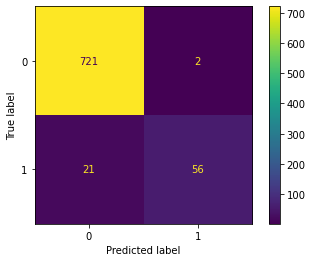

,Accuracy,Recall,Precision,f1
0,0.97125,0.727273,0.965517,0.82963


In [198]:
#train the model
rf_m = model_trainer(rf, x_train, y_train)

#evaluate on validation data
rf_mdf = model_evaluator(rf_m, x_val, y_val)
rf_mdf

- the random forest model, has a precision of 96.6% which means that 96% of the predictions for customers that will accept the loan were correct.
- the recall however indicates that only 72.3% of the people that accepted the loan in the data were classified correctly by the model.

## visualizing the feature importance of the Random forest model

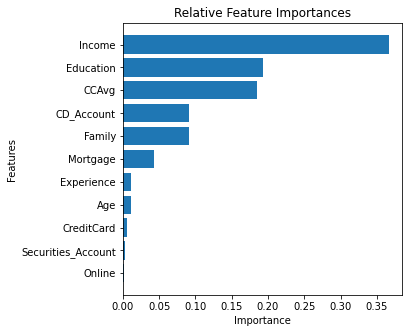

In [150]:
plot_feat_importances(rf_m, x_train)


- the random forest model, still considers income,family, education, CCAvg as good contributors.
- however, securities_account and online are poor contributors.
- relative to the prunned decision tree model, it considers mortgage, experience, CD_Account and age to contribute a little to the mortgage. This could be because these features were randomly selected for splitting by some of the trees instead of a single tree making decisions at the nodes as in decision tree model.

## increasing the depth of the Random forest model

train accuracy : 0.991


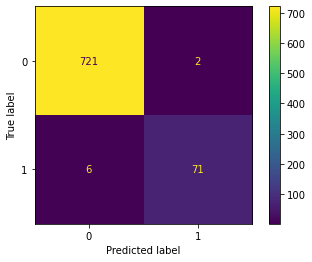

,Accuracy,Recall,Precision,f1
0,0.99,0.922078,0.972603,0.946667


In [199]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=6)

#train the model
rf_m = model_trainer(rf, x_train, y_train)

#evaluate on validation data
rf_mdf = model_evaluator(rf_m, x_val, y_val,)
rf_mdf

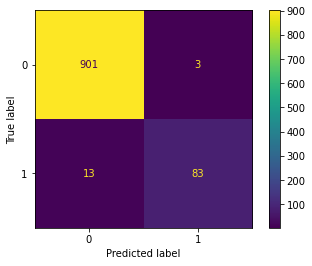

,Accuracy,Recall,Precision,f1
0,0.984,0.864583,0.965116,0.912088


In [200]:
model_evaluator(rf_m, x_test, y_test,)

- increasing the depth of the random tree model increased all the metrics.
- only 2 of 73 customers predicted to accept the loan truly accepted the loan. hence the accuracy of 97.3%
- the model misclassified 6 people as though they will reject the loan. however from our data, these 6 customers accepted the offer. 



## visualizing the feature importance of the Random forest model with increased depth

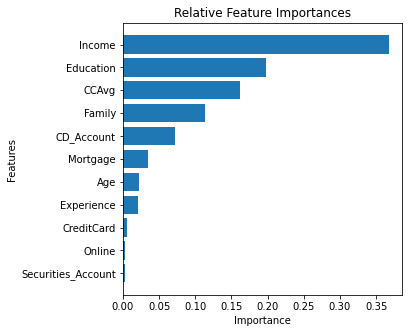

In [167]:
plot_feat_importances(rf_m, x_train)



- the features showed improved contribution to the model.
- Online and Securities_Account are still the poorest contributors
### relative to the pre-prunned decision tree model with a precision of 1 at 0.55 threshold, the following are to be considered

- the increased depth of the random forest model, showed that the features had better contribution and optimized recall at 0.5 threshold. the trade-off is that the precision is slighly reduced.
- the implication is that the model will make better use of the features in classifying a customer. also, 92% of the customers that accepted the loan were accounted for and 97.3% of the predictions for customers with 50% likelihood of accepting the loan was correct.

## implement gridsearchcv on the random forest model

In [201]:
#instantiate the algorithm
rf = RandomForestClassifier(random_state=0)

#instantiate the gridsearch algorithm
gs_rf = GridSearchCV(estimator=rf ,scoring='precision', param_grid={'criterion' : ["gini", "entropy", "log_loss"],
                                                'max_depth': [4,5,6,7]}, cv=5, n_jobs=-1)
#fit the algorithm 
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7]},
             scoring='precision')

In [202]:
#obtain the best parameters
gs_rf.best_score_

0.9945945945945945

In [203]:
best_params = gs_rf.best_params_
best_params

{'criterion': 'gini', 'max_depth': 4}

## rebuild random forest model with best paramaters

train accuracy : 0.973


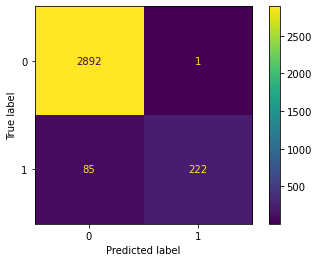

,Accuracy,Recall,Precision,f1
0,0.973125,0.723127,0.995516,0.837736


In [204]:
rf = RandomForestClassifier(**best_params, random_state=0, n_jobs=-1)
#train the model
rf_m = model_trainer(rf, x_train, y_train)

#evaluate the performance on train set
rf_mdf = model_evaluator(rf_m, x_train, y_train)
rf_mdf

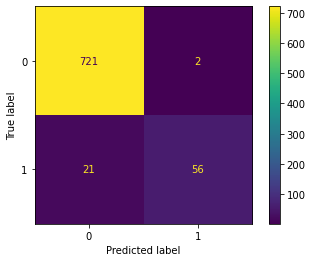

,Accuracy,Recall,Precision,f1
0,0.97125,0.727273,0.965517,0.82963


In [205]:
#evaluate the performance on validation set
rf_mdf = model_evaluator(rf_m, x_val, y_val,)
rf_mdf

- the precision score of the model on the validation set indicates that 96.5% of the predictions for customers predicted to accept the loan were accurate.
- the f1 is 0.83
- the recall indicates that only 72.3% of the customers that accepted the loan in the data were classified correctly

## performance on the test set

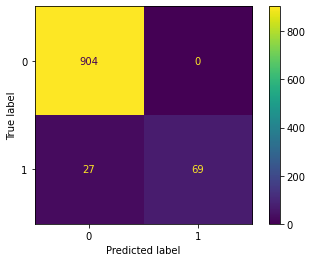

,Accuracy,Recall,Precision,f1
0,0.973,0.71875,1.0,0.836364


In [206]:
model_evaluator(rf_m, x_test, y_test,)

- this model has the following advantages
- 1. it shows more contribution from all the features at different levels
- 2. so far it has the highest cross validation score, which is a sign that it will generalize better than other models so far.
- 3. the consistency in metric value across the 3 data sets is a sign of strong generalization.


## Gradient Boosting

## implementing gradient boosting

In [177]:
#instantiate the tree model
gr = GradientBoostingClassifier(max_depth=3, random_state=0)

#peform a 5-k-fold cross validation and return the recall for each split
score = cross_val_score(gr, X, y, cv=5, scoring='precision', n_jobs=-1)

#return the average of the scores

score
np.mean(score)

0.9493202907019688

- this model has lower cross validation score

train accuracy : 0.995


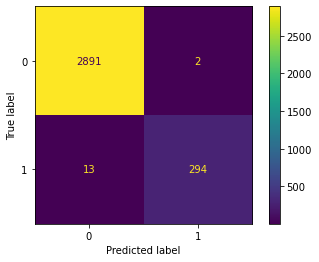

,Accuracy,Recall,Precision,f1
0,0.995313,0.957655,0.993243,0.975124


In [174]:
#instantiate the model
gr = GradientBoostingClassifier(random_state=0,max_depth=3)

#fit the algoritm
gr_m = model_trainer(gr, x_train, y_train)

#evaluate train performance
gr_mdf = model_evaluator(gr_m, x_train, y_train)
gr_mdf

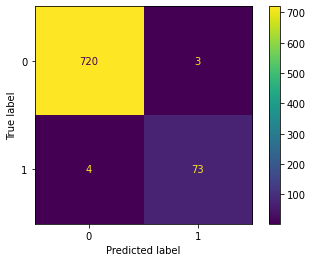

,Accuracy,Recall,Precision,f1
0,0.99125,0.948052,0.960526,0.954248


In [175]:
#evaluate test performance
gr_mdf = model_evaluator(gr_m, x_val, y_val)
gr_mdf

- the Gradient_boosting model, has a precision value of 96% which means that 96% of the predictions for customers that will accept the loan offer was correct. This value is lower than the precision of the Random forest model with increased depth.
- The recall score indicates that 84.8% of the customers that accepted the loan in the data were correctly classified.

## increasing the depth of the gradient boosting models
- max_depth = 4

train accuracy : 1.000


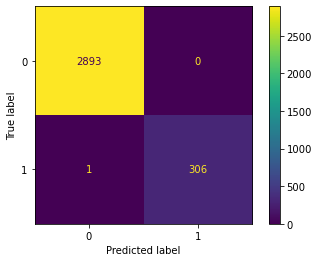

,Accuracy,Recall,Precision,f1
0,0.999687,0.996743,1.0,0.998369


In [195]:
#instantiate the model
gr = GradientBoostingClassifier(random_state=0,max_depth=4)

#fit the algoritm
gr_m = model_trainer(gr, x_train, y_train)

#evaluate train performance
gr_mdf = model_evaluator(gr_m, x_train, y_train)
gr_mdf

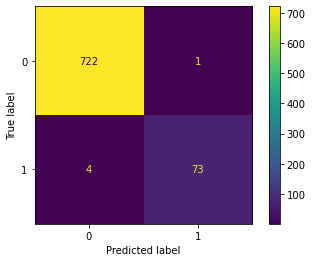

,Accuracy,Recall,Precision,f1
0,0.99375,0.948052,0.986486,0.966887


In [179]:
#evaluate validation data performance
gr_mdf = model_evaluator(gr_m, x_val, y_val)
gr_mdf

- increasing the depth of each shallow trees of the gradient boosting model, increased the precision on the validation set to 0.987, This means that 98.7% of the predictions for customers that will accept the loan were correct.
- the Recall score suggests that 94.8% of the customers that accepted the loan offer were correctly classified by the model.
- the f1 is 96.7%

## implementing cross-validation on this model, to verify the generalization performance

In [181]:
from sklearn.model_selection import cross_val_score

#instantiate the model
gr = GradientBoostingClassifier(random_state=0,max_depth=4)

score = cross_val_score(estimator=gr, cv=5, X= X, y=y, scoring='precision', n_jobs=-1)

np.mean(score)

0.9652540394594367

In [182]:
print(f"The average value of the precision on the dataset from 5 fold cross validation is {np.mean(score).round(3)}")

The average value of the precision on the dataset from 5 fold cross validation is 0.965


- the cross validation score is lesser than that of Random forest which means that random forest model could best generalize than the gradient boosting model

## plotting the feature importances

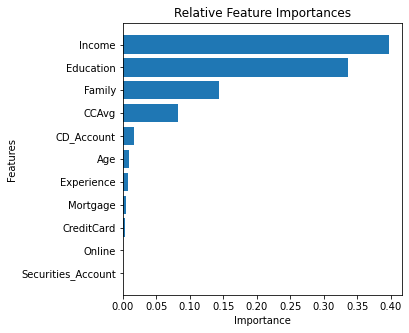

In [183]:
plot_feat_importances(gr_m, x_train)

- all the Tree and ensemble models, did not consider 'Online' and 'Securities_Account' as good contributors to the model and as such will be dropped.
- Income, education, family, CCAvg were consistent as good contributors to the model.


## hyper-parameters optimization using gridsearchCV

In [207]:
#instantiate the algorithm
gr = GradientBoostingClassifier(random_state=0)

grids = GridSearchCV(estimator=gr, param_grid = {'loss':['log_loss', 'exponential'],
                                             'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                                             'criterion': ['friedman_mse', 'squared_error'],
                                             'max_depth': [3,4]}, n_jobs=-1, cv=5, scoring='precision')
grids_m = grids.fit(x_train, y_train)

In [208]:
grids_m.best_score_

0.9625623370483684

In [209]:
best_params = grids_m.best_params_
best_params

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'exponential',
 'max_depth': 4}

## rebuild model using suggested parameters

train accuracy : 1.000


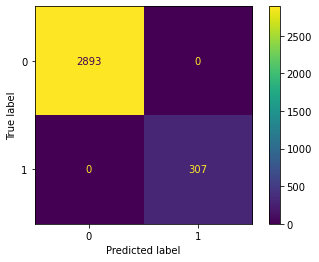

,Accuracy,Recall,Precision,f1
0,1.0,1.0,1.0,1.0


In [210]:
gb_gr = GradientBoostingClassifier(random_state=0, **best_params)

gb_gr_m = model_trainer(gb_gr, x_train, y_train)

gb_gr_mdf = model_evaluator(gb_gr_m, x_train, y_train)
gb_gr_mdf

- the model seems to overfit on the training data

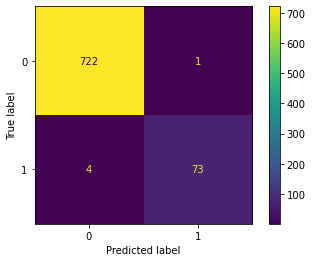

,Accuracy,Recall,Precision,f1
0,0.99375,0.948052,0.986486,0.966887


In [211]:
gb_gr_mdf = model_evaluator(gb_gr_m, x_val, y_val)
gb_gr_mdf

- a high performance is also seen from the validation data.
- 98.6% of the predictions for customers that will accept the loan by the model were correct.(precision)
- 94.8% of the customers that accepted the loan in the validation data were correctly classified

## performance on test set

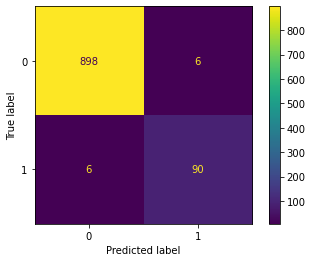

,Accuracy,Recall,Precision,f1
0,0.988,0.9375,0.9375,0.9375


In [212]:
gb_gr_mdf = model_evaluator(gb_gr_m, x_test, y_test)
gb_gr_mdf

- the precision score indicates that 93.8% of the model's prediction for customers that will accept the loan was correct.
- the recall sugest that only 93.8% of the customers in the test data were rightly identified by the model.
- the f1 is 0.94
- the accuracy means that the total number correct predictions made by the model relative to the total number of predictions is 98.8%

# Insights
- customers with more family members accepted the loan so more focus can be channeled at onboarding such customers
- customers with higher education accepted the loan.
- more customers with higher average spending on credit card (3-10) accpeted the personal_loan.
- more customers with mortgage accepted the loan. more people with mortgage value close to 600, accepted the loan.
- customer that have security account have a higher tendency of accepting the loan offer.
- customers with CD_account have higher tendency of accepting the loan.
- the higher the income of an individual, the higher the tendency  of them accepting the loan because more people with higher income accepted the loan offer.
 - The scope of this project does not cover the probability of loan defaulting. 


# Recommendations
- Based on past performance, An ideal customer that has the following characteristics has higher tendecies of accepting the loan
    - customer should have a family
    - well educated
    - should have high average monthly spending on credit card
    - has a CD_account with the bank (if possible)
    - should have mortgage
    - be a high income earner.

- To encourage inclusion, if it is inline with business KPI, the principal and the interest rate could be reduced while the maturity period can be increased so as to encourage lower earners to accept the loan. This is because based on the data, only people that match the characteristics above accepted the loan. However, more research is needed to come to a conclusion on this subject.
- From the model's relatove importances, 'securites_account' and 'online' features should not be used in considering if a customer will accept the loan or not.

## Best Model
- based on the performance of all the models, the best model i will recommend is the GridsearchCV optimized random forest model and here are my reasons.
    - it had the highest cross validation score for precision.
    - it had much more consistent values for all the metrics on all the dataset.
    